In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/jiaaoyu/Desktop/steam-store-games/steam.csv")
data.shape

(27075, 18)

## 对rating进行计算并labeling

In [2]:
df =data
p = df['positive_ratings']
n = df['negative_ratings']
df['ratings'] = ((p + 1.9208) / (p + n) - 1.96 * np.sqrt((p * n) / (p + n) + 0.9604) / (p + n)) / (1 + 3.8416 / (p + n)) 
df1 = df.sort_values(by=['ratings'],ascending=False)
df1.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,ratings
23296,888790,Sabbat of the Witch,10/26/18,1,Yuzusoft,NekoNyan Ltd.,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Simulation,Visual Novel;Sexual Content;Nudity,20,521,2,0,0,0-20000,23.79,0.986165
23,620,Portal 2,4/18/11,1,Valve,Valve,windows;mac;linux,0,Single-player;Co-op;Steam Achievements;Full co...,Action;Adventure,Puzzle;Co-op;First-Person,51,138220,1891,1102,520,10000000-20000000,7.19,0.985886
7577,427520,Factorio,2/25/16,1,Wube Software LTD.,Wube Software LTD.,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Casual;Indie;Simulation;Strategy;Early Access,Early Access;Base-Building;Resource Management,38,47918,723,10087,6880,1000000-2000000,21.00,0.984022
18404,745880,東方天空璋 ～ Hidden Star in Four Seasons.,11/17/17,0,上海アリス幻樂団,"Mediascape Co., Ltd.",windows,0,Single-player;Partial Controller Support;Steam...,Action;Indie,Bullet Hell;Great Soundtrack;Difficult,0,4114,53,413,413,50000-100000,11.39,0.983402
14298,623080,planetarian HD,5/8/17,0,VisualArts/Key,VisualArts,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Simulation,Visual Novel;Anime;Casual,21,927,10,0,0,0-20000,6.99,0.980466


In [15]:
df1['ratings'].describe(percentiles=[.6,.7,.8,.9,.95])

count    27075.000000
mean         0.531288
std          0.253608
min          0.000000
50%          0.560171
60%          0.633009
70%          0.704189
80%          0.776010
90%          0.853925
95%          0.899685
max          0.986165
Name: ratings, dtype: float64

In [14]:
ax = df1.plot.bar(y='ratings', rot=0 )

KeyboardInterrupt: 

In [16]:
df2= df1['ratings'].copy()
k = 2 #设置离散之后的数据段为5
 
 
#聚类离散
from sklearn.cluster import KMeans
 
kmodel = KMeans(n_clusters = k, n_jobs = 12)#n_jobs是并行数，一般等于CPU数
kmodel.fit(df2.values.reshape((len(df2), 1)))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=12, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
c = pd.DataFrame(kmodel.cluster_centers_, columns=list('a')).sort_values(by='a')
#rolling_mean表示移动平均，即用当前值和前2个数值取平均数，
#由于通过移动平均，会使得第一个数变为空值，因此需要使用.iloc[1:]过滤掉空值。
c

,a
0,0.283075
1,0.717713


In [18]:
w = c.rolling(2).mean().iloc[1:]#此处w=[2174.1003996693553, 8547.46386803177, 22710.538501243103, 48516.861774600904]
w

,a
1,0.500394


In [11]:
ww = [0] + list(w.values[0]) + [df2.max()]#把首末边界点加上，首边界为0，末边界为data的最大值120000，此处w=[0, 2174.1003996693553, 8547.46386803177, 22710.538501243103, 48516.861774600904, 120000.0]
ww

[0, 0.5003942383003729, 0.9861651389878652]

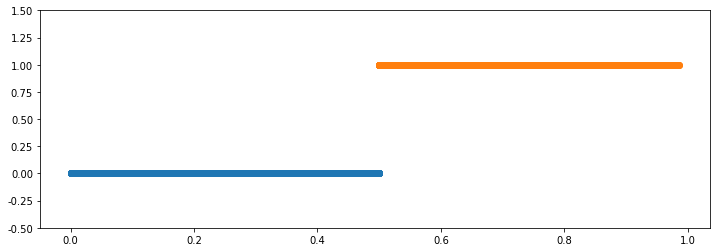

In [12]:
d3 = pd.cut(df2, ww, labels = range(k))#cut函数实现将data中的数据按照w的边界分类。
 
 
def cluster_plot(d,k):
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize = (12,4))
    for j in range(0,k):
        plt.plot(df2[d==j], [j for i in d[d==j]],'o')
        
    plt.ylim(-0.5, k-0.5)
    return plt
 
cluster_plot(d3, k).show()

In [12]:
df1['ratings'].describe()

count    27075.000000
mean         0.531288
std          0.253608
min          0.000000
25%          0.342372
50%          0.560171
75%          0.741070
max          0.986165
Name: ratings, dtype: float64